# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

text = pd.read_csv(r'result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》第九章

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）
|   Name  |   Description  |
| :---: | :---: |
|  散点图   |   通常用于比较跨类型的聚合数据，主要解释数据之间的规律 |
|   气泡图  |    散点图的变种，引入了第三个度量作为气泡的大小 |
|   面积图  |   面积图更注重数据类型之间随时间趋势的变化关系  |
|    直方图 |  又称质量分布图，柱形图的统计型变种  |
| 饼图 |  常用于ppt，统计学模块   |

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

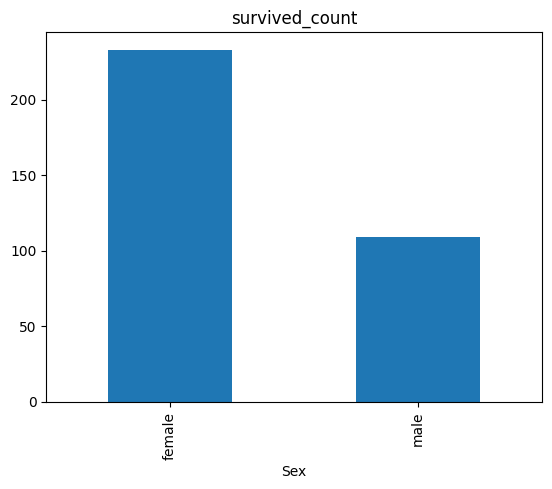

In [3]:

sex = text.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.title('survived_count')
plt.show()



【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

Text(0, 0.5, 'count')

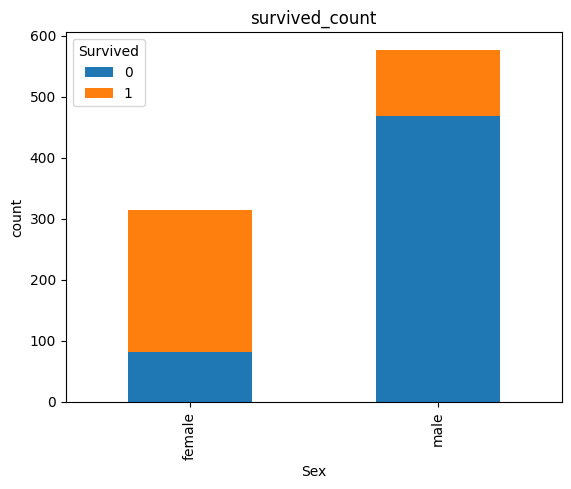

In [5]:
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count')
plt.ylabel('count')



【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

In [24]:

fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_sur



Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
13.0000  1           16
                     ..
7.7417   0            1
26.2833  1            1
7.7375   1            1
26.3875  1            1
22.5250  0            1
Name: Survived, Length: 330, dtype: int64

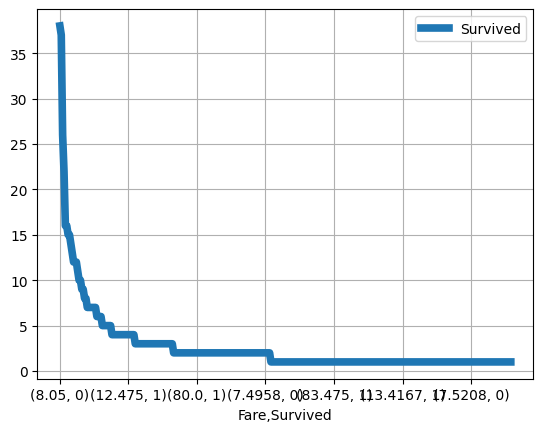

In [31]:
#figure调整图片大小，grid调整网格
fare_sur.plot(grid=True,linewidth = '5.5')
plt.legend()
plt.show()

In [12]:
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
fare_sur1

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

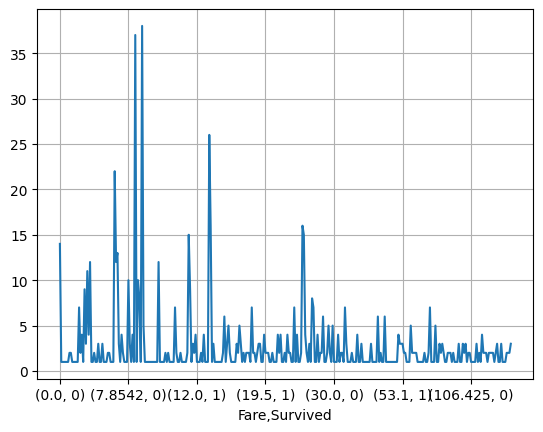

In [16]:
fare_sur1.plot(grid=True)
#legend增加图例
plt.legend()
plt.show()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [18]:
fare_sur = text.groupby(['Pclass'])['Survived'].value_counts()
fare_sur


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Pclass', ylabel='count'>

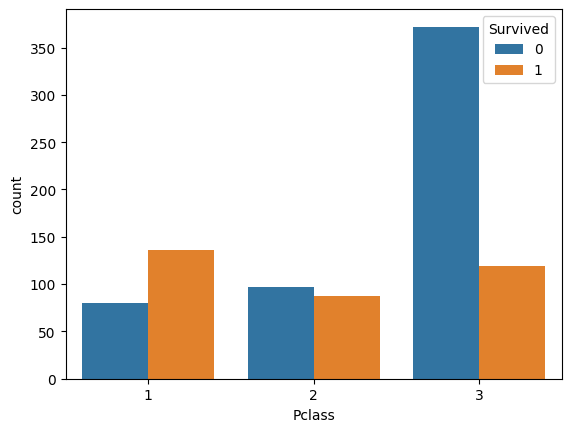

In [22]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=text)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结
- 数据表格可视化的东西可以进行很多的修改，从不同维度和习惯，可视度。

#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

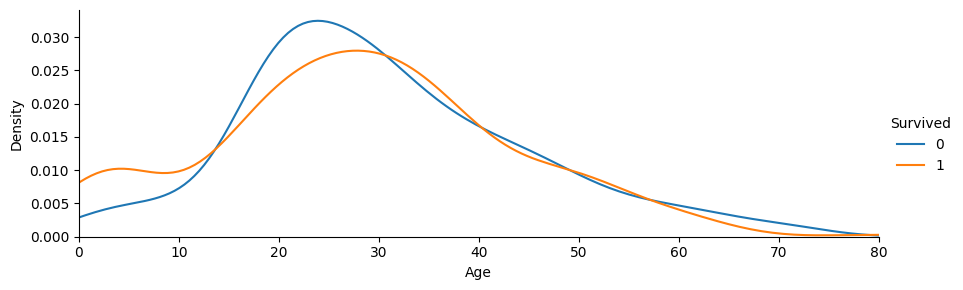

In [32]:
#`shade` is now deprecated in favor of `fill`; setting `fill=True`.
#This will become an error in seaborn v0.14.0; please update your code.
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',fill= False)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()


#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

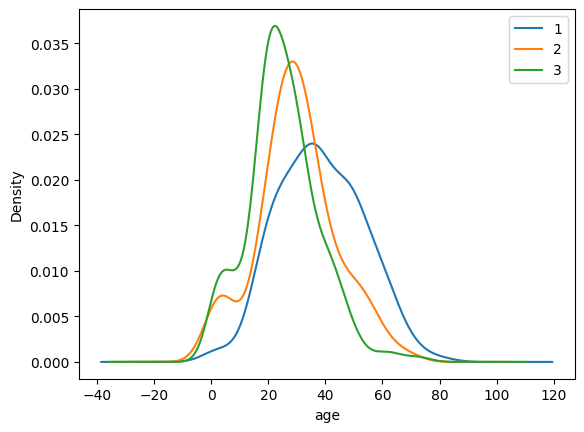

In [27]:
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")


【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现
1. 随着版本的改变，对应的函数参数引用会改变
2. 要根据不同的数据问题做出不同的可视化图案会便于观察
3. 结合官网的使用方法对函数的参数进行改变，输出结果，对比会更加容易理解

【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？